# Estadística Aplicada

Sesión 15 - 25 de Septiembre

David Eduardo Gómez Marín - 1914352 Grupo 41

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#especializadas
from statsmodels.tsa.seasonal import seasonal_decompose

##Tamaño de gráficas (largo, ancho)
plt.rcParams['figure.figsize'] = (10,6)

En series de tiempo, el tiempo debe ser el INDEX del dataframe

In [3]:
## datos
#En este caso, haremos que el tiempo sea el index de la sig. manera pd.read('dataframe', index_col='columna del tiempo')
#también, además de poner 'month' como indx, queremos que python lo reconosca como fecha, con 'parse_dates = true' y nos da el formato de fechas SQL de YYYY - MM - DD
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True )

In [4]:
#Ponemos el nombre de la columnas en español porque aquí no somos malinchistas
pasajeros = pasajeros.rename(columns={'Thousands of Passengers' : 'Miles de pasajeros'})

<Axes: xlabel='Month'>

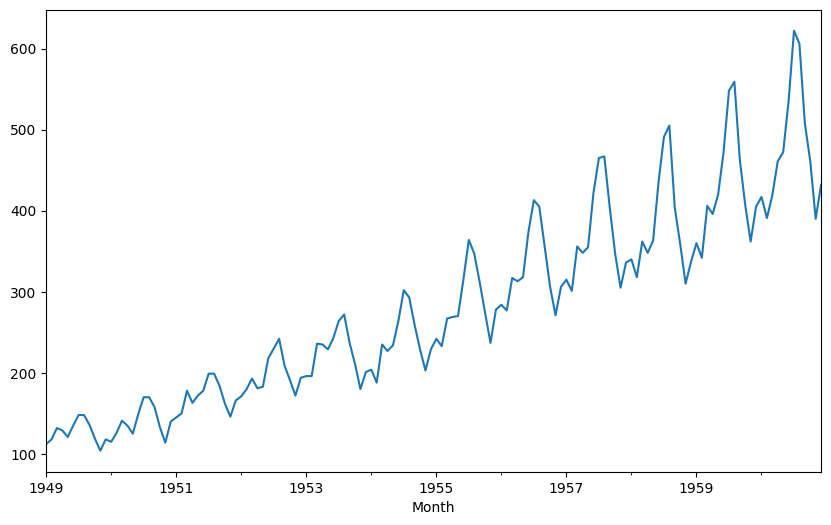

In [11]:
#En pandas, por default, el index es el eje x, en este caso, el tiempo month
pasajeros['Miles de pasajeros'].plot()


Esta serie tiene tendencia positiva (creciente) y un marcado componente estacional.

In [12]:
## Vamos a descomponer la serie en tres elementos

#1. Tendencia - ciclo

#2. Estacional

#3. Irregular

ets1 = seasonal_decompose(pasajeros['Miles de pasajeros'], model='mult')

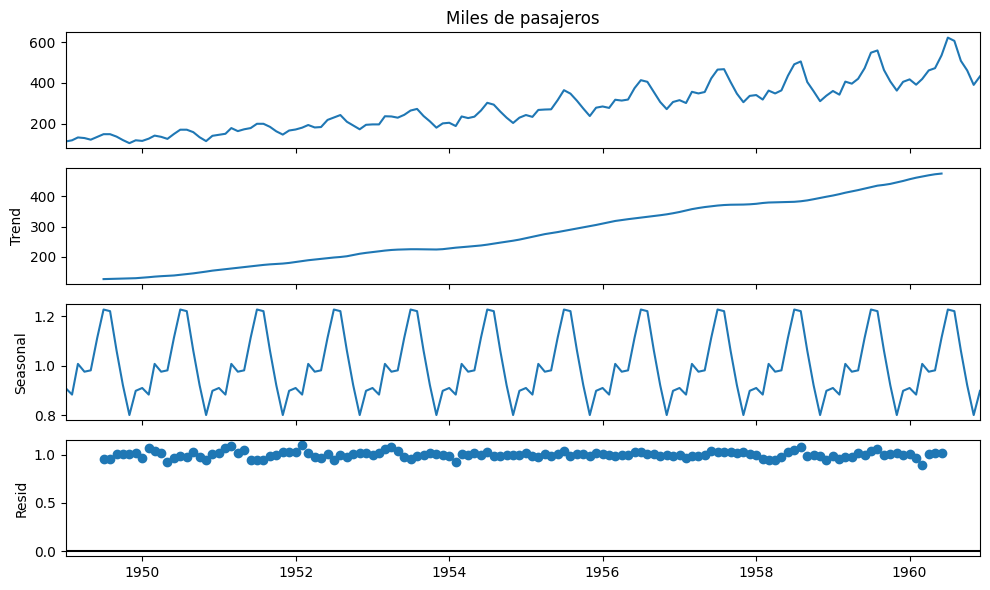

In [14]:
ets1.plot();

In [18]:
#Si queremos acceder al componente tendencia-ciclo
ets1.trend

#Nótese que tanto los primeros como los último datos no tienen tendencia ya que no se sabe la tendenia anterior a los datos observados, o sea, no sabemos si la gráfica venía bajando y nosotros solo observamos donde rebotó y empezó a subir. Tampoco, al final de nuestros datos, no sabemos que tendencia tendrá la gráfca, si seguirá subiendo o empezará a bajar, por lo que, al no tener esas tendencias, aparece NaN

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [16]:
#Acceder al omponente estacional
ets1.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [17]:
#Acceder al componente irregular
ets1.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

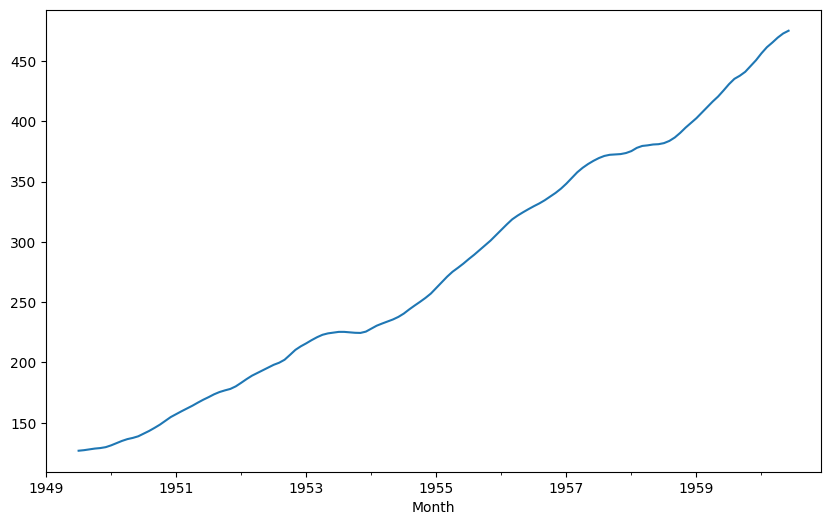

In [19]:
#Graficar tendecnia-ciclo
ets1.trend.plot();

In [20]:
# Desestacionalizar
#Ya que es multiplicativa, para eliminar el componente estacional, hay que dividir por el componente estacional

pasajeros['desestacionalizada'] = pasajeros['Miles de pasajeros'] / ets1.seasonal

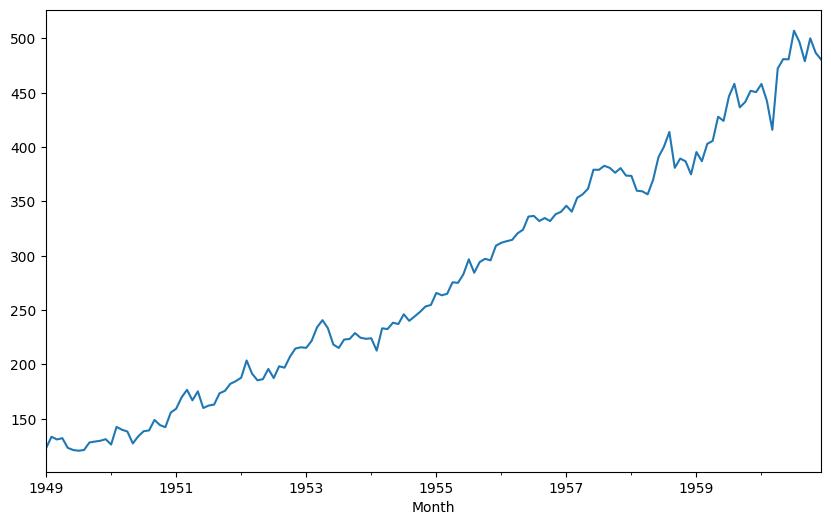

In [21]:
pasajeros['desestacionalizada'].plot();

In [23]:
#mandar esto a un excel
pasajeros.to_excel('pasajeos.xlsx')

27 de Septiembre

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf

In [3]:
walmex = yf.download('WALMEX.MX', start = '2016-01-01', end = '2021-12-31', progress = False)

In [4]:
walmex.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-01-04  42.959999  43.299999  42.299999  42.840000  35.479038   6483179
2016-01-05  42.849998  43.900002  42.540001  42.660000  35.329971   8115974
2016-01-06  42.650002  43.020000  42.070000  42.380001  35.098072  12511056
2016-01-07  41.320000  42.240002  39.259998  39.990002  33.118729  18124494
2016-01-08  40.990002  41.490002  40.700001  41.029999  33.980034  15949791

In [5]:
walmex = walmex['Adj Close']

In [ ]:
walmex.to_excel('Walmex.xlsx')